In [425]:
import urllib
import urllib.request
import json
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!pip install folium
import folium
from IPython.display import display

API ที่เลือก
API จัดเตรียมโดย https://data.police.uk/docs/method/crime-street/
โดยเฉพาะ API : ระดับการเกิดอาชญากรรมบนท้องถนนที่ประเทศอังกฤษเดือนกรกฎาคม ปีพ.ศ.2020 (JSON) https://data.police.uk/api/crimes-street/all-crime?lat=52.629729&lng=-1.131592 
API สามารถใช้ได้ฟรี
Support Email Address: feedback@data.police.uk

เรียกดึงข้อมูล API 

In [426]:
#Link:URL file Json 
url = "https://data.police.uk/api/crimes-street/all-crime?lat=52.629729&lng=-1.131592"
response = urllib.request.urlopen(url)
#อ่านไฟล์๋Json 
raw_json = response .read()
#แยกวิเคราะห์ JSON โดยแปลงจากสตริงเป็นโครงสร้างข้อมูล Python และเก็บอยู่ใน data
data = json.loads(raw_json)
data

[{'category': 'anti-social-behaviour',
  'location_type': 'Force',
  'location': {'latitude': '52.638452',
   'street': {'id': 883307, 'name': 'On or near Parking Area'},
   'longitude': '-1.128697'},
  'context': '',
  'outcome_status': None,
  'persistent_id': '',
  'id': 85257500,
  'location_subtype': '',
  'month': '2020-07'},
 {'category': 'anti-social-behaviour',
  'location_type': 'Force',
  'location': {'latitude': '52.636110',
   'street': {'id': 883290, 'name': 'On or near Humberstone Gate'},
   'longitude': '-1.131802'},
  'context': '',
  'outcome_status': None,
  'persistent_id': '',
  'id': 85264554,
  'location_subtype': '',
  'month': '2020-07'},
 {'category': 'anti-social-behaviour',
  'location_type': 'Force',
  'location': {'latitude': '52.626439',
   'street': {'id': 882465, 'name': 'On or near Evington Place'},
   'longitude': '-1.111429'},
  'context': '',
  'outcome_status': None,
  'persistent_id': '',
  'id': 85264861,
  'location_subtype': '',
  'month': '202

In [427]:
#ใช้ json_normalize ใน Pandas เพื่อสร้าง Data Frame ของข้อมูล JSON 
df = json_normalize(data)

<ipython-input-427-d3e86d272e24>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(data)


In [428]:
df #แสดงข้อมูลใน Dataframe

,category,location_type,context,outcome_status,persistent_id,id,location_subtype,month,location.latitude,location.street.id,location.street.name,location.longitude,outcome_status.category,outcome_status.date
0,anti-social-behaviour,Force,,NaN,,85257500,,2020-07,52.638452,883307,On or near Parking Area,-1.128697,NaN,NaN
1,anti-social-behaviour,Force,,NaN,,85264554,,2020-07,52.636110,883290,On or near Humberstone Gate,-1.131802,NaN,NaN
2,anti-social-behaviour,Force,,NaN,,85264861,,2020-07,52.626439,882465,On or near Evington Place,-1.111429,NaN,NaN
3,anti-social-behaviour,Force,,NaN,,85263742,,2020-07,52.627664,883457,On or near Supermarket,-1.149757,NaN,NaN
4,anti-social-behaviour,Force,,NaN,,85263731,,2020-07,52.630628,883143,On or near Gopsall Street,-1.116219,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,other-crime,Force,,NaN,f5b7c056c2b17571520d40309765c85766d824044dd6e9...,85265170,,2020-07,52.625777,882372,On or near Further/higher Educational Building,-1.125181,Under investigation,2020-07
1098,other-crime,Force,,NaN,9ad22dba4e2a17cb934749dab5a7374ab5cb08632c5659...,85260747,,2020-07,52.635695,883350,On or near Lower Free Lane,-1.130274,Under investigation,2020-07
1099,other-crime,Force,,NaN,40d0e9bd9455e6a6d5c8013893cbd57da44a52984d6aab...,85257259,,2020-07,52.641932,884323,On or near Montreal Road,-1.123898,Unable to prosecute suspect,2020-07
1100,other-crime,Force,,NaN,6cfd0c6cb73688a872db33ecdb05de17c02a703e17cad7...,85262079,,2020-07,52.627112,882209,On or near Narborough Road,-1.150477,Unable to prosecute suspect,2020-07


หลังจากปรุงแต่งข้อมูลเสร็จแล้วเซฟข้อมูลใน Dataframe เป็นไฟล์CSV ชื่อไฟล์ After_clean_Data

In [429]:
df.to_csv("before_clean_Data.csv") #Export Dataframe to file.csv
print(df)

                   category location_type context  outcome_status  \
0     anti-social-behaviour         Force                     NaN   
1     anti-social-behaviour         Force                     NaN   
2     anti-social-behaviour         Force                     NaN   
3     anti-social-behaviour         Force                     NaN   
4     anti-social-behaviour         Force                     NaN   
...                     ...           ...     ...             ...   
1097            other-crime         Force                     NaN   
1098            other-crime         Force                     NaN   
1099            other-crime         Force                     NaN   
1100            other-crime         Force                     NaN   
1101            other-crime         Force                     NaN   

                                          persistent_id        id  \
0                                                        85257500   
1                                

แสดงจำนวนแถวของข้อมูล,Missing value,Data typeของแต่ละคอัมน์

In [431]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 1102 non-null   object 
 1   location_type            1102 non-null   object 
 2   context                  1102 non-null   object 
 3   outcome_status           0 non-null      float64
 4   persistent_id            1102 non-null   object 
 5   id                       1102 non-null   int64  
 6   location_subtype         1102 non-null   object 
 7   month                    1102 non-null   object 
 8   location.latitude        1102 non-null   object 
 9   location.street.id       1102 non-null   int64  
 10  location.street.name     1102 non-null   object 
 11  location.longitude       1102 non-null   object 
 12  outcome_status.category  934 non-null    object 
 13  outcome_status.date      934 non-null    object 
dtypes: float64(1), int64(2),

ตรวจสอบพบว่ามีค่า NULL คอลัม outcome_status,outcome_status.category,outcome_status.date 

In [432]:
df.isnull().sum() #ตรวจสอบว่ามีค่าว่างของข้อมูลในแต่ละคอลัมภ์หรือไม่

category                      0
location_type                 0
context                       0
outcome_status             1102
persistent_id                 0
id                            0
location_subtype              0
month                         0
location.latitude             0
location.street.id            0
location.street.name          0
location.longitude            0
outcome_status.category     168
outcome_status.date         168
dtype: int64

แสดงประเภทอาชญากรรมแต่ละประเภท

In [433]:
df["category"].value_counts() #เช็คจำนวนประเภทอาชญากรรมในระดับถนน

violent-crime            365
anti-social-behaviour    168
public-order             134
criminal-damage-arson     84
other-theft               61
shoplifting               53
burglary                  53
drugs                     52
vehicle-crime             37
bicycle-theft             27
possession-of-weapons     22
robbery                   19
other-crime               14
theft-from-the-person     13
Name: category, dtype: int64

แสดงจำนวนชื่อสถานที่หรือถนนที่เกิดอาชญากรรม

In [434]:
 df["location.street.name"].value_counts() #จำนวนสถานที่และชื่อถนนที่เกิดเหตุ

On or near Supermarket                  42
On or near Petrol Station               37
On or near Parking Area                 27
On or near Leicester Royal Infirmiry    21
On or near Euston Street                20
                                        ..
On or near Cherryleas Drive              1
On or near Connaught Street              1
On or near Lincoln Street                1
On or near Noble Street                  1
On or near Willow Street                 1
Name: location.street.name, Length: 295, dtype: int64

แสดงสถานะแต่ละประเภทอาชญากรรม มีค่า Null อยู่จำนวน168ค่า

In [435]:
 df["outcome_status.category"].value_counts() #จำนวนผลการบันทึล่่าสุดของแต่ละประเภทอาชญากรรม

Under investigation                                    379
Investigation complete; no suspect identified          243
Unable to prosecute suspect                            192
Awaiting court outcome                                  45
Local resolution                                        34
Further investigation is not in the public interest     16
Formal action is not in the public interest             15
Action to be taken by another organisation               7
Offender given a caution                                 2
Further action is not in the public interest             1
Name: outcome_status.category, dtype: int64

แสดง ประเภทของสถานที่ตำรวจ ทั้ง Force หรือ BTP,
Force ระบุตำแหน่งกองกำลังตำรวจปกติ
BTP กองกำลังตำรวจแห่งชาติสำหรับรถไฟ สถานที่ BTP อยู่ในขอบเขตกองกำลังตำรวจปกติ

In [436]:
 df["location_type"].value_counts() #แสดงจำนวนประเภทของสถานที่ตำรวจ

Force    1099
BTP         3
Name: location_type, dtype: int64

แสดงจำนวนข้อมูลแถวที่ซ้ำกัน พบว่าไม่มีจำนวนแถวข้อมูบที่ซ้ำกัน

In [437]:
df.duplicated()
len(df[df.duplicated(keep = False)]) #เช็คว่ามีจำนวนแถวที่ซ้ำกันทั้งหมดเท่าไหร่่

0

ลบคอลัมน์ที่ไม่ได้ใช้

In [438]:
df.drop(["context","outcome_status","persistent_id","location_subtype","outcome_status.date"],axis= 1, inplace=True) #ใช้คำสั่งดร็อปคอลัมน์ที่ไม่ได้ใช้ออก

In [439]:
df #แสดงข้อมูลใน Dataframe จาก14คอลัมน์เหลือ9คอลัมน์

,category,location_type,id,month,location.latitude,location.street.id,location.street.name,location.longitude,outcome_status.category
0,anti-social-behaviour,Force,85257500,2020-07,52.638452,883307,On or near Parking Area,-1.128697,NaN
1,anti-social-behaviour,Force,85264554,2020-07,52.636110,883290,On or near Humberstone Gate,-1.131802,NaN
2,anti-social-behaviour,Force,85264861,2020-07,52.626439,882465,On or near Evington Place,-1.111429,NaN
3,anti-social-behaviour,Force,85263742,2020-07,52.627664,883457,On or near Supermarket,-1.149757,NaN
4,anti-social-behaviour,Force,85263731,2020-07,52.630628,883143,On or near Gopsall Street,-1.116219,NaN
...,...,...,...,...,...,...,...,...,...
1097,other-crime,Force,85265170,2020-07,52.625777,882372,On or near Further/higher Educational Building,-1.125181,Under investigation
1098,other-crime,Force,85260747,2020-07,52.635695,883350,On or near Lower Free Lane,-1.130274,Under investigation
1099,other-crime,Force,85257259,2020-07,52.641932,884323,On or near Montreal Road,-1.123898,Unable to prosecute suspect
1100,other-crime,Force,85262079,2020-07,52.627112,882209,On or near Narborough Road,-1.150477,Unable to prosecute suspect


เนื่องจากบางคอลัมน์ outcome_status.category เป็นค่า NaN ไม่มีคำอธิบายสถานะของประเภทอาชญากรรม
จึงเปลี่ยนจากค่า NaN เป็นข้อความ The value could't determined

In [494]:
df["outcome_status.category"].fillna("The value could't determined",inplace = True)
df

,category,location_type,id,month,location.latitude,location.street.id,location.street.name,location.longitude,outcome_status.category
0,anti-social-behaviour,Force,85257500,2020-07,52.638452,883307,On or near Parking Area,-1.128697,The value could't determined
1,anti-social-behaviour,Force,85264554,2020-07,52.636110,883290,On or near Humberstone Gate,-1.131802,The value could't determined
2,anti-social-behaviour,Force,85264861,2020-07,52.626439,882465,On or near Evington Place,-1.111429,The value could't determined
3,anti-social-behaviour,Force,85263742,2020-07,52.627664,883457,On or near Supermarket,-1.149757,The value could't determined
4,anti-social-behaviour,Force,85263731,2020-07,52.630628,883143,On or near Gopsall Street,-1.116219,The value could't determined
...,...,...,...,...,...,...,...,...,...
1097,other-crime,Force,85265170,2020-07,52.625777,882372,On or near Further/higher Educational Building,-1.125181,Under investigation
1098,other-crime,Force,85260747,2020-07,52.635695,883350,On or near Lower Free Lane,-1.130274,Under investigation
1099,other-crime,Force,85257259,2020-07,52.641932,884323,On or near Montreal Road,-1.123898,Unable to prosecute suspect
1100,other-crime,Force,85262079,2020-07,52.627112,882209,On or near Narborough Road,-1.150477,Unable to prosecute suspect


เปลี่ยนชื่อคอลัมน์ให้ดูอ่านง่ายขึ้น

In [495]:
df_2 = df.rename(columns = {"id":"ID","category":"Category",
                           "location_type":"Location_type",
                            "month": "Month",
                            "location.street.id":"Street_id",
                           "location.street.name":"Location_Street_name",
                            "location.latitude":"Latitude",
                           "location.longitude":"Longitude",
                          "outcome_status.category":"Status_category"}) #ใช้คำสั่งเปลี่ยนชื่อคอลัม์ 


In [496]:
df_2

,Category,Location_type,ID,Month,Latitude,Street_id,Location_Street_name,Longitude,Status_category
0,anti-social-behaviour,Force,85257500,2020-07,52.638452,883307,On or near Parking Area,-1.128697,The value could't determined
1,anti-social-behaviour,Force,85264554,2020-07,52.636110,883290,On or near Humberstone Gate,-1.131802,The value could't determined
2,anti-social-behaviour,Force,85264861,2020-07,52.626439,882465,On or near Evington Place,-1.111429,The value could't determined
3,anti-social-behaviour,Force,85263742,2020-07,52.627664,883457,On or near Supermarket,-1.149757,The value could't determined
4,anti-social-behaviour,Force,85263731,2020-07,52.630628,883143,On or near Gopsall Street,-1.116219,The value could't determined
...,...,...,...,...,...,...,...,...,...
1097,other-crime,Force,85265170,2020-07,52.625777,882372,On or near Further/higher Educational Building,-1.125181,Under investigation
1098,other-crime,Force,85260747,2020-07,52.635695,883350,On or near Lower Free Lane,-1.130274,Under investigation
1099,other-crime,Force,85257259,2020-07,52.641932,884323,On or near Montreal Road,-1.123898,Unable to prosecute suspect
1100,other-crime,Force,85262079,2020-07,52.627112,882209,On or near Narborough Road,-1.150477,Unable to prosecute suspect


แสดงจำนวนข้อมูลแถวที่ซ้ำกันหลังจากเปลี่ยนค่าNan และลบจำนวนคอลัมน์ที่ไม่ใช้ออก พบว่าไม่มีจำนวนแถวข้อมูบที่ซ้ำกัน 

In [443]:
len(df[df.duplicated(keep = False)]) #เช็คว่ามีจำนวนแถวที่ซ้ำกันทั้งหมดเท่าไหร่

0

แสดงจำนวนค่าNaNแต่ะละคอลัมน์หลังจากลบคอลัมน์ที่ไม่ใช้ออกและแทนที่ค่าNaN ด้วยThe value could't determined พบว่าแต่ละคอมลัมน์ไม่มีค่าNaN

In [444]:
df_2.isnull().sum() #เช็คจำนวนค่าNaNของแต่ละคอลัมน์อีกรอบ

Category                0
Location_type           0
ID                      0
Month                   0
Latitude                0
Street_id               0
Location_Street_name    0
Longitude               0
Status_category         0
dtype: int64

หลังจากปรุงแต่งข้อมูลเสร็จแล้วเซฟข้อมูลใน Dataframe เป็นไฟล์CSV ชื่อไฟล์ After_clean_Data

In [445]:
df_2.to_csv("After_clean_Data.csv") #Export Dataframe to file.csv
print(df_2)

                   Category Location_type        ID    Month   Latitude  \
0     anti-social-behaviour         Force  85257500  2020-07  52.638452   
1     anti-social-behaviour         Force  85264554  2020-07  52.636110   
2     anti-social-behaviour         Force  85264861  2020-07  52.626439   
3     anti-social-behaviour         Force  85263742  2020-07  52.627664   
4     anti-social-behaviour         Force  85263731  2020-07  52.630628   
...                     ...           ...       ...      ...        ...   
1097            other-crime         Force  85265170  2020-07  52.625777   
1098            other-crime         Force  85260747  2020-07  52.635695   
1099            other-crime         Force  85257259  2020-07  52.641932   
1100            other-crime         Force  85262079  2020-07  52.627112   
1101            other-crime         Force  85263144  2020-07  52.627692   

      Street_id                            Location_Street_name  Longitude  \
0        883307      

แสดงจำนวนแต่ละประเภทของอาชญากรรม

In [446]:
count_category = df_2["Category"].value_counts() #นับจำนวนประเภทของอาชญากรรมในคอลัมน์ Category
count_category

violent-crime            365
anti-social-behaviour    168
public-order             134
criminal-damage-arson     84
other-theft               61
shoplifting               53
burglary                  53
drugs                     52
vehicle-crime             37
bicycle-theft             27
possession-of-weapons     22
robbery                   19
other-crime               14
theft-from-the-person     13
Name: Category, dtype: int64

แสดงกราฟภาพรวมประเภทระดับการเกิดอาชญากรรมทั้งหมดบนท้องถนนที่ประเทศอังกฤษเดือนกรกฎาคม ปีพ.ศ.2020 
ทำให้ทราบว่าจำนวนที่เกิดอาชญากรรมมากที่สุดคืออาชญากรรประเภท violent-crime และน้อยที่สุดคือ theft-from-the-person

Text(0, 0.5, 'Total Count')

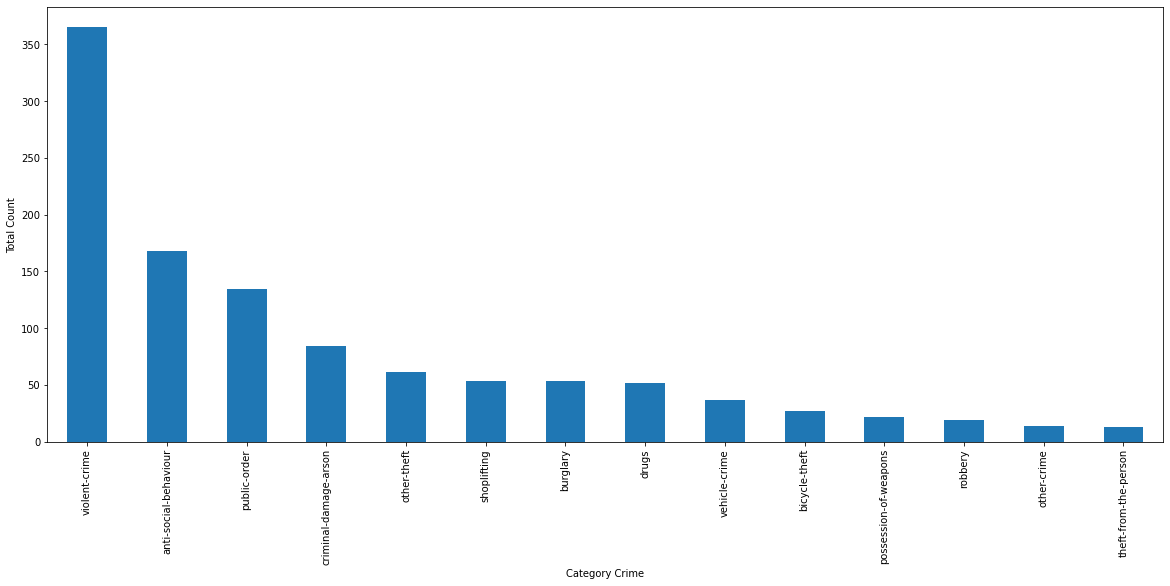

In [447]:
my_plot = total_category.plot(kind="bar",figsize=(20, 8)) #นำtotal_categoryมาพล็อตกราฟประเภท bar chart 
my_plot.set_xlabel("Category Crime") #กำหนดตัวแปรแกน x
my_plot.set_ylabel("Total Count") #กำหนดตัวแปรแกน Y

In [448]:
c = df_2[df_2['Category'] == 'violent-crime']['Location_Street_name'].value_counts().head(10) #
c

On or near Leicester Royal Infirmiry              14
On or near Supermarket                            10
On or near Parking Area                            9
On or near Granby Street                           9
On or near Nightclub                               9
On or near Petrol Station                          9
On or near Prison                                  9
On or near Cromford Street                         7
On or near Further/higher Educational Building     6
On or near The Oval                                6
Name: Location_Street_name, dtype: int64

In [449]:
count_lsname = df_2["Location_Street_name"].value_counts()  #นับจำนวนสถานที่หรือถนนเกิดอาชญากรรม
count_lsname.head(10) #แสดงแค่10อันดับสถานที่หรือถนนที่เกิดอาชญากรรมมากที่สุด

On or near Supermarket                            42
On or near Petrol Station                         37
On or near Parking Area                           27
On or near Leicester Royal Infirmiry              21
On or near Euston Street                          20
On or near Nightclub                              19
On or near Granby Street                          15
On or near Tudor Road                             14
On or near Further/higher Educational Building    14
On or near Prison                                 14
Name: Location_Street_name, dtype: int64

แสดงกราฟสถานที่หรือถนนที่เกิดอาชญากรรมมากที่สุด10อันดับบนท้องถนนที่ประเทศอังกฤษเดือนกรกฎาคม ปีพ.ศ.2020 

Text(0, 0.5, 'Total Count')

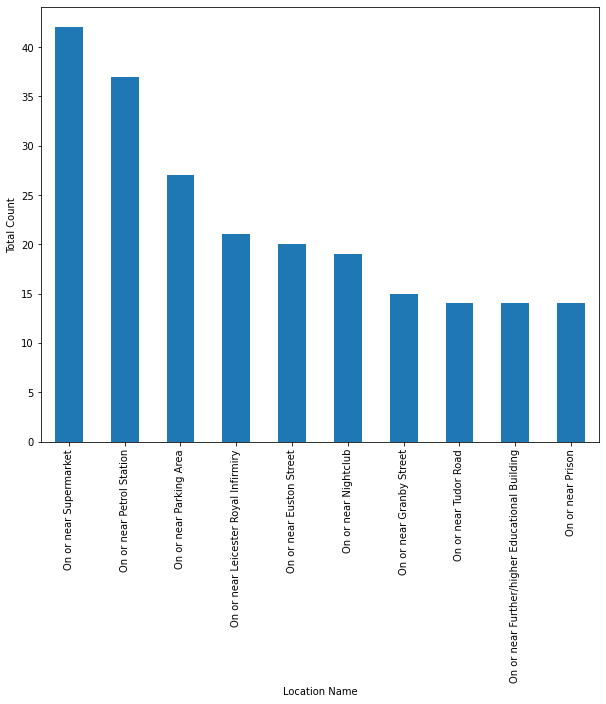

In [450]:
my_plot = count_lsname.head(10).plot(kind="bar",figsize=(10, 8)) #นำจำนวน count_lsname 10อันดับที่มากที่สุดมาพล็อตกราฟประเภท bar chart 
my_plot.set_xlabel("Location Name") #กำหนดตัวแปรแกน x
my_plot.set_ylabel("Total Count") #กำหนดตัวแปรแกน y

เนื่องจาก On or near Supermarketเป็นสถานที่ที่เกิดอาชญากรรมเยอะที่สุด จึงแสดงจำนวนแต่ละประเภทอาชญากรรมที่เกิดขึ้นที่ On or near Supermarket 

In [451]:
location_born_ct = df_2[df_2['Location_Street_name'] == 'On or near Supermarket']['Category'].value_counts() #แสดงจำนวนประเภทอาชญากรรมแต่ะประเภทที่เกิดขึ้นที่On or near Supermarket 
location_born_ct

shoplifting              11
violent-crime            10
other-theft               6
anti-social-behaviour     5
public-order              4
burglary                  3
criminal-damage-arson     2
vehicle-crime             1
Name: Category, dtype: int64

สถานที่หรือถนน ที่ On or near Supermarket เป็นสถานที่หรือถนนที่เกิดเหตหุอาชญารรมเยอะที่สุด42ครั้งจากกราฟด้านบน จึงนำมาแสดงว่าเกิดประเภทอาชญากรรมแต่ละประเภทอะไรบ้าง ทำให้รู้ประเภทอาชญากรรมที่เกิดขึ้นมากที่สุดคือshopliftingและน้อยที่สุดคือvehicle-crime ที่ On or near Supermarket และเราสามารถที่จะเตรียมระงับเหตุของอาชญากรรมแต่ละประเภทที่เกิดขึ้นที่ on or near Supermarket และเพิ่มความปลอดภัยได้

Text(0, 0.5, 'Total Count')

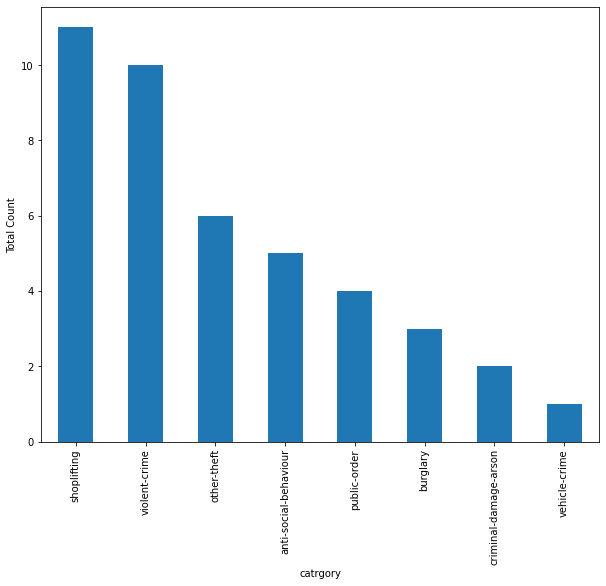

In [453]:
my_plot = location_born_ct.plot(kind="bar",figsize=(10, 8)) #นำจำนวน location_born_ct มาพล็อตกราฟประเภท bar chart 
my_plot.set_xlabel("catrgory")  #กำหนดตัวแปรแกน x
my_plot.set_ylabel("Total Count") #กำหนดตัวแปรแกน y

In [506]:
mapp = folium.Map(location=[52.638452, -1.128697]) 
tooltip = 'Click me!'
for i in range(len(df_2)):
    folium.Marker([df_2['Latitude'].iloc[i], df_2['Longitude'].iloc[i]], popup=df_2['Location_Street_name'].iloc[i], tooltip=tooltip).add_to(mapp)
display(mapp)

In [526]:
total = df_2["Category"].value_counts(normalize = True)
total

violent-crime            0.331216
anti-social-behaviour    0.152450
public-order             0.121597
criminal-damage-arson    0.076225
other-theft              0.055354
shoplifting              0.048094
burglary                 0.048094
drugs                    0.047187
vehicle-crime            0.033575
bicycle-theft            0.024501
possession-of-weapons    0.019964
robbery                  0.017241
other-crime              0.012704
theft-from-the-person    0.011797
Name: Category, dtype: float64

In [522]:
df_2["Category"]

0       anti-social-behaviour
1       anti-social-behaviour
2       anti-social-behaviour
3       anti-social-behaviour
4       anti-social-behaviour
                ...          
1097              other-crime
1098              other-crime
1099              other-crime
1100              other-crime
1101              other-crime
Name: Category, Length: 1102, dtype: object